In [1]:
import pandas as pd
# ingredients 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly 
import plotly.graph_objs as go 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import silhouette_score 

In [12]:
pl=pd.read_csv('/Users/macbook/Documents/spotify_playlist.csv')

# Get the data: check the data info

In [13]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5413 entries, 0 to 5412
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5413 non-null   int64  
 1   Songs             5413 non-null   object 
 2   Artist            5413 non-null   object 
 3   id                5413 non-null   object 
 4   external_url      5413 non-null   object 
 5   danceability      5413 non-null   float64
 6   energy            5413 non-null   float64
 7   key               5413 non-null   int64  
 8   loudness          5413 non-null   float64
 9   mode              5413 non-null   int64  
 10  speechiness       5413 non-null   float64
 11  acousticness      5413 non-null   float64
 12  instrumentalness  5413 non-null   float64
 13  liveness          5413 non-null   float64
 14  valence           5413 non-null   float64
 15  tempo             5413 non-null   float64
 16  type              5413 non-null   object 


In [14]:
pl.describe()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5413.000000,5413.000000,5413.000000,5413.000000,5413.000000,5413.000000,5413.000000,5413.000000,5413.000000,5413.000000,5413.000000,5413.000000,5.413000e+03,5413.000000
mean,2706.000000,0.631388,0.632188,5.181600,-7.866456,0.661001,0.106101,0.231651,0.023554,0.188516,0.530633,121.588482,2.284358e+05,3.963052
std,1562.742834,0.150927,0.189781,3.636538,3.350733,0.473413,0.115508,0.250665,0.105224,0.153130,0.248333,27.363399,6.491095e+04,0.288550
min,0.000000,0.000000,0.010400,0.000000,-25.698000,0.000000,0.000000,0.000006,0.000000,0.015700,0.000000,0.000000,1.340000e+04,0.000000
25%,1353.000000,0.529000,0.508000,2.000000,-9.654000,0.000000,0.034000,0.032800,0.000000,0.095000,0.327000,100.380000,1.894670e+05,4.000000
50%,2706.000000,0.640000,0.649000,5.000000,-7.227000,1.000000,0.049600,0.134000,0.000005,0.128000,0.528000,120.999000,2.202270e+05,4.000000
75%,4059.000000,0.742000,0.777000,9.000000,-5.442000,1.000000,0.131000,0.364000,0.000482,0.236000,0.742000,139.000000,2.584000e+05,4.000000
max,5412.000000,0.974000,0.996000,11.000000,1.221000,1.000000,0.930000,0.987000,0.949000,0.989000,0.992000,211.270000,1.024133e+06,5.000000


In [15]:
pl.head(2)

,Unnamed: 0,Songs,Artist,id,external_url,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Put Your Lights On (feat. Everlast),Santana,3uRaD26t3RkJ8n549udQ83,https://open.spotify.com/track/3uRaD26t3RkJ8n5...,0.606,0.834,7,-6.101,1,...,0.0244,0.133,0.459,143.681,audio_features,spotify:track:3uRaD26t3RkJ8n549udQ83,https://api.spotify.com/v1/tracks/3uRaD26t3RkJ...,https://api.spotify.com/v1/audio-analysis/3uRa...,287493,4
1,1,Sex & Candy,Marcy Playground,5mkGfmJGFZpwK9nA5amOhv,https://open.spotify.com/track/5mkGfmJGFZpwK9n...,0.670,0.558,2,-9.159,1,...,0.0000,0.106,0.630,80.511,audio_features,spotify:track:5mkGfmJGFZpwK9nA5amOhv,https://api.spotify.com/v1/tracks/5mkGfmJGFZpw...,https://api.spotify.com/v1/audio-analysis/5mkG...,173493,4


In [16]:
# drop some useless column
new_pl=pl.drop(['Unnamed: 0','Songs','Artist','id','external_url','type','uri','track_href','analysis_url'], axis = 1)

In [17]:
new_pl.head(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.606,0.834,7,-6.101,1,0.0369,0.0155,0.0244,0.133,0.459,143.681,287493,4
1,0.670,0.558,2,-9.159,1,0.0251,0.2380,0.0000,0.106,0.630,80.511,173493,4


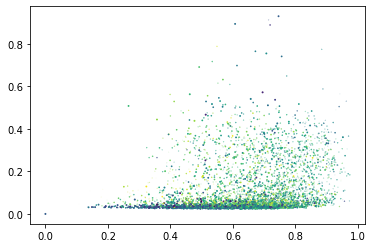

In [19]:
plt.scatter(new_pl.iloc[:,0],new_pl.iloc[:,5], new_pl.iloc[:,6],new_pl.iloc[:,1]);

# Scale the data:

In df, there is tempo, duration, time_signature have big range of value, therefor we need to scale the date into the same range

In [28]:
scaler=StandardScaler()

In [29]:
scaler.fit(new_pl)

StandardScaler()

In [30]:
scaler.mean_

array([ 6.31387770e-01,  6.32188140e-01,  5.18159985e+00, -7.86645557e+00,
        6.61001293e-01,  1.06100979e-01,  2.31651371e-01,  2.35543077e-02,
        1.88515814e-01,  5.30633456e-01,  1.21588482e+02,  2.28435770e+05,
        3.96305191e+00])

In [26]:
pl_scaled=scaler.transform(new_pl)

In [31]:
last_df=pd.DataFrame(pl_scaled,columns=['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature'])

In [32]:
last_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5.413000e+03,5.413000e+03,5.413000e+03,5.413000e+03,5.413000e+03,5.413000e+03,5.413000e+03,5.413000e+03,5.413000e+03,5.413000e+03,5.413000e+03,5.413000e+03,5.413000e+03
mean,9.513707e-17,2.044468e-16,-3.330874e-17,2.257775e-16,3.069368e-15,6.339737e-17,-8.339492e-17,-3.970539e-16,3.859015e-17,-1.249283e-16,4.569799e-16,-4.056939e-17,-4.736856e-15
std,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00
min,-4.183787e+00,-3.276643e+00,-1.425003e+00,-5.322177e+00,-1.396375e+00,-9.186412e-01,-9.242085e-01,-2.238690e-01,-1.128664e+00,-2.136984e+00,-4.443882e+00,-3.313087e+00,-1.373562e+01
25%,-6.784557e-01,-6.544355e-01,-8.749789e-01,-5.335280e-01,-1.396375e+00,-6.242631e-01,-7.933681e-01,-2.238690e-01,-6.107538e-01,-8.200790e-01,-7.751391e-01,-6.003974e-01,1.280591e-01
50%,5.706752e-02,8.859363e-02,-4.994218e-02,1.908582e-01,7.161399e-01,-4.891956e-01,-3.896050e-01,-2.238233e-01,-3.952301e-01,-1.060554e-02,-2.154471e-02,-1.264737e-01,1.280591e-01
75%,7.329537e-01,7.631165e-01,1.050107e+00,7.236267e-01,7.161399e-01,2.155802e-01,5.280385e-01,-2.192879e-01,3.101202e-01,8.512219e-01,6.363656e-01,4.616632e-01,1.280591e-01
max,2.270264e+00,1.917183e+00,1.600131e+00,2.712331e+00,7.161399e-01,7.133465e+00,3.013655e+00,8.795783e+00,5.227979e+00,1.858030e+00,3.277729e+00,1.225942e+01,3.593978e+00


array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

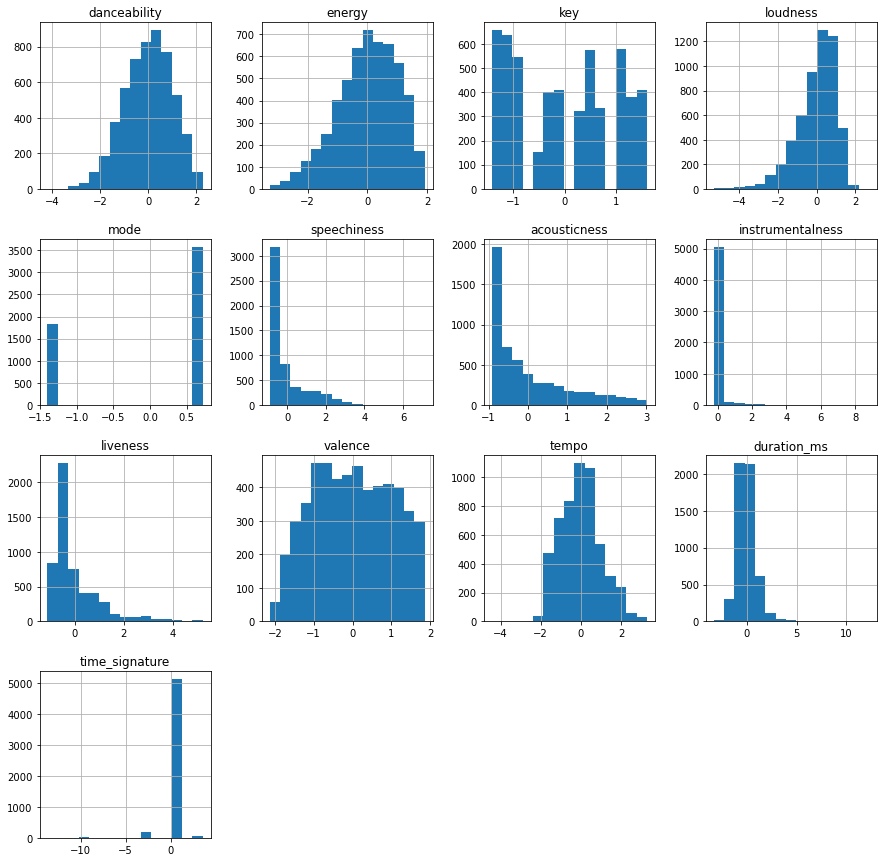

In [33]:
last_df.hist(bins=15, figsize=(15,15))

# Check the best K

In [34]:
K=range(5,18)
inertia=[]
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=5)
    kmeans.fit(last_df)
    inertia.append(kmeans.inertia_)

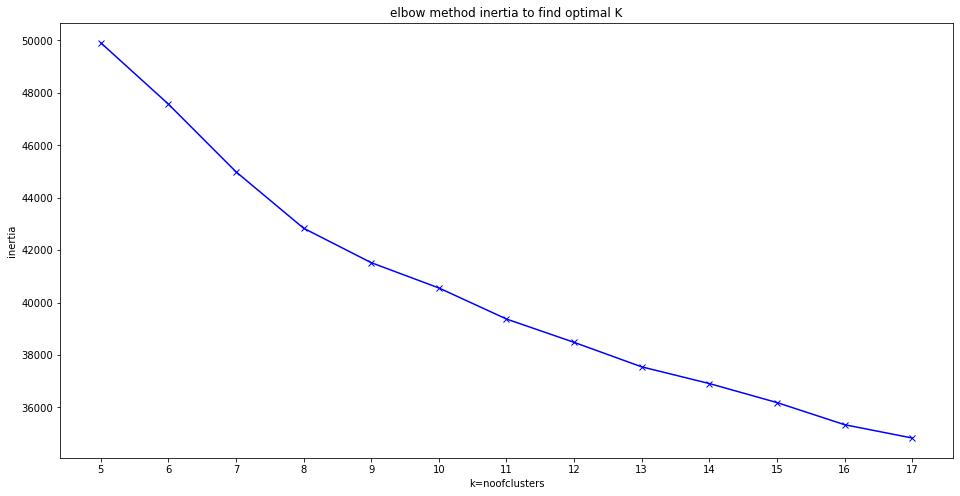

In [35]:
#plot the resulting inertia - elbow 
plt.figure(figsize=(16,8))
plt.plot(K,inertia,'bx-')
plt.xlabel('k=noofclusters')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('elbow method inertia to find optimal K');

### silhouette_score

In [36]:
K=range(5,18)
sil=[]
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=5)
    kmeans.fit(last_df)
    sil.append(silhouette_score(last_df,kmeans.predict(last_df)))

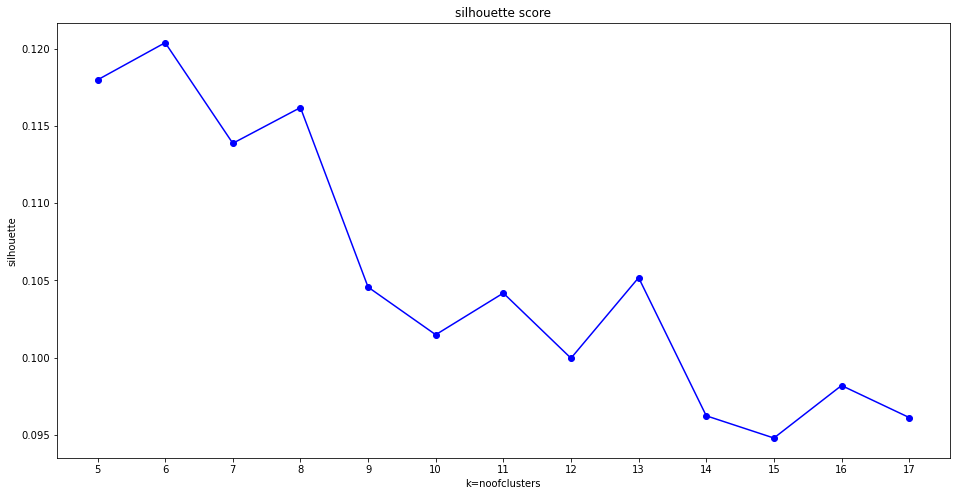

In [37]:
#plot the resulting silhouette 
plt.figure(figsize=(16,8))
plt.plot(K,sil,'bo-')
plt.xlabel('k=noofclusters')
plt.ylabel('silhouette')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('silhouette score');

# Create Cluster_no based on the K=9

In [38]:
K_Means=KMeans(n_clusters=9,random_state=5)

In [39]:
cluster_sc=K_Means.fit(last_df)

In [40]:
cluster_sc.cluster_centers_

array([[ 7.59998321e-01, -2.10551461e-01, -8.67369238e-02,
         1.97696198e-01, -8.80727585e-02,  1.87883652e+00,
        -2.47593384e-01, -1.95978003e-01, -6.44703256e-02,
        -4.74665315e-01,  2.71922548e-01, -3.02040116e-01,
         2.42792955e-01],
       [-5.91638441e-01, -1.60882978e+00, -2.09131125e-02,
        -1.36438930e+00,  2.54516219e-01, -5.03574543e-01,
         1.75250073e+00, -5.36116741e-02, -2.72612571e-01,
        -5.91405341e-01, -2.82284801e-01, -1.58339121e-01,
         1.60150925e-01],
       [ 3.28335367e-01,  4.09670900e-01,  3.03114074e-01,
         4.24436824e-01, -1.39637522e+00, -1.24636324e-01,
        -3.75290672e-01, -1.54694618e-01, -1.73403053e-01,
         1.49636171e-01,  5.80571274e-03, -5.67208230e-02,
         1.43671330e-01],
       [-3.14887974e-01,  4.10496211e-01,  1.40651745e-01,
         2.17570252e-01,  2.75669274e-02,  2.32740344e-01,
        -1.13676309e-01, -1.92856422e-01,  2.92035872e+00,
         4.77001015e-02, -5.00262086e

In [41]:
cluster_sc.labels_

array([4, 5, 2, ..., 6, 7, 1], dtype=int32)

In [42]:
last_df['cluster_no']= cluster_sc.labels_

In [43]:
last_df['cluster_no'].value_counts()

2    1109
4    1056
5     737
0     726
7     605
1     540
3     316
6     209
8     115
Name: cluster_no, dtype: int64

In [44]:
last_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_no
0,-0.168228,1.063490,0.500082,0.526935,0.716140,-0.599154,-0.862391,0.008038,-0.362575,-0.288484,0.807449,0.909903,0.128059,4
1,0.255858,-0.390950,-0.874979,-0.385785,0.716140,-0.701321,0.025329,-0.223869,-0.538913,0.400172,-1.501322,-0.846511,0.128059,5
2,0.149836,0.937017,-0.324954,0.479478,-1.396375,-0.669286,-0.895546,-0.200013,-0.153582,0.525016,-0.254578,-0.433384,0.128059,2
3,-1.155552,1.458718,-1.425003,-0.472939,0.716140,-0.644177,-0.917848,-0.221246,-0.349513,0.903576,-0.204324,-1.105752,0.128059,4
4,-1.632648,-1.049664,1.600131,-0.414737,0.716140,-0.542010,0.037299,-0.223802,-0.512788,-0.417356,-1.155463,1.497023,0.128059,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5408,-1.520000,-1.039124,0.500082,-0.203719,0.716140,-0.624263,-0.341728,-0.223487,0.297058,-1.842996,1.845684,0.427767,0.128059,7
5409,-0.314007,0.494361,-1.149991,0.973744,0.716140,-0.597423,-0.365666,-0.223869,-0.588548,-0.534146,-0.533955,-0.246341,0.128059,4
5410,-2.116370,-0.844145,-0.874979,0.155937,0.716140,-0.559327,1.780821,-0.223869,-0.532382,-0.743562,-1.437655,-0.099973,-3.337860,6
5411,-0.055580,-1.529207,-1.425003,-0.246997,0.716140,-0.589630,-0.870769,-0.184711,-0.538913,-1.730233,-0.239630,-0.336627,0.128059,7


In [45]:
pl.head(1)

,Unnamed: 0,Songs,Artist,id,external_url,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Put Your Lights On (feat. Everlast),Santana,3uRaD26t3RkJ8n549udQ83,https://open.spotify.com/track/3uRaD26t3RkJ8n5...,0.606,0.834,7,-6.101,1,...,0.0244,0.133,0.459,143.681,audio_features,spotify:track:3uRaD26t3RkJ8n549udQ83,https://api.spotify.com/v1/tracks/3uRaD26t3RkJ...,https://api.spotify.com/v1/audio-analysis/3uRa...,287493,4


# Creating a song detail dataframe:

In [50]:
cluster=last_df['cluster_no']
detail=pl[['Songs','Artist','id']].join(cluster)
detail

,Songs,Artist,id,cluster_no
0,Put Your Lights On (feat. Everlast),Santana,3uRaD26t3RkJ8n549udQ83,4
1,Sex & Candy,Marcy Playground,5mkGfmJGFZpwK9nA5amOhv,5
2,Island In The Sun,Weezer,2MLHyLy5z5l5YRp7momlgw,2
3,Laid,James,2CdS3DRqWR5LAhy4hM5X9W,4
4,Lightning Crashes,Live,48iWbsOaBUAGzMdoSmqyg1,7
...,...,...,...,...
5408,Song 6,George Ezra,31ypEgZwfK9bpBY3kRvIgf,7
5409,Pretty Shining People,George Ezra,2JVwsN6viHjR9t5pCPQ4Br,4
5410,Never Alone,Jim Brickman,0JwhT2vTrFK4eFlX5ecTdf,6
5411,Wishlist,Pearl Jam,7hObovvcbBpXgZHQ9if4WU,7


In [51]:
# export to csv file
detail.to_csv('/Users/macbook/Documents/cluster_playlist.csv')